#### Libraries

In [1]:
import pandas as pd
import janitor
import matplotlib.pyplot as plt

# Dataset Birthrates

## Import the dataset

### About the dataset

#### Download
The dataset is an open dataset downloaded from [datos.gob.ar](https://datos.gob.ar/dataset/salud-tasa-natalidad/archivo/salud_0f68d5c6-e667-40ca-90fd-4784336e092e).
```shell
wget http://datos.salud.gob.ar/dataset/314e08d7-70a1-4704-aa2f-e86ce03b359d/resource/0f68d5c6-e667-40ca-90fd-4784336e092e/download/tasa-natalidad-deis-2000-2021.csv
```
### Description
Contains the birth rate by province between 2000 and 2021.

| Variable | Type | Description |
|---|---|---|
| indice_tiempo | Fecha ISO-8601 (date)|Periodo de tiempo analizado |
| natalidad_argentina | Número decimal (number)|Tasa de Natalidad de Argentina Nacidos |
| natalidad_ciudad_autonoma_de_buenos_aires | Número decimal (number)|Tasa de Natalidad de Ciudad Autónoma de Buenos Aires Nacidos |
| natalidad_buenos_aires | Número decimal (number)|Tasa de Natalidad de la Provincia de Buenos Aires Nacidos |
| natalidad_catamarca | Número decimal (number)|Tasa de Natalidad de la Provincia de Catamarca Nacidos |
| natalidad_cordoba | Número decimal (number)|Tasa de Natalidad de la Provincia de Córdoba Nacidos |
| natalidad_corrientes | Número decimal (number)|Tasa de Natalidad de la Provincia de Corrientes Nacidos |
| natalidad_chaco | Número decimal (number)|Tasa de Natalidad de la Provincia de Chaco Nacidos |
| natalidad_chubut | Número decimal (number)|Tasa de Natalidad de la Provincia de Chubut Nacidos |
| natalidad_entre_rios | Número decimal (number)|Tasa de Natalidad de la Provincia de Entre Ríos Nacidos |
| natalidad_formosa | Número decimal (number)|Tasa de Natalidad de la Provincia de Formosa Nacidos |
| natalidad_jujuy | Número decimal (number)|Tasa de Natalidad de la Provincia de Jujuy Nacidos |
| natalidad_la_pampa | Número decimal (number)|Tasa de Natalidad de la Provincia de La Pampa Nacidos |
| natalidad_la_rioja | Número decimal (number)|Tasa de Natalidad de la Provincia de La Rioja Nacidos |
| natalidad_mendoza | Número decimal (number)|Tasa de Natalidad de la Provincia de Mendoza Nacidos |
| natalidad_misiones | Número decimal (number)|Tasa de Natalidad de la Provincia de Misiones Nacidos |
| natalidad_neuquen | Número decimal (number)|Tasa de Natalidad de la Provincia de Neuquen Nacidos |
| natalidad_rio_negro | Número decimal (number)|Tasa de Natalidad de la Provincia de Río Negro Nacidos |
| natalidad_salta | Número decimal (number)|Tasa de Natalidad de la Provincia de Salta Nacidos |
| natalidad_san_juan | Número decimal (number)|Tasa de Natalidad de la Provincia de San Juan Nacidos |
| natalidad_san_luis | Número decimal (number)|Tasa de Natalidad de la Provincia de San Luis Nacidos |
| natalidad_santa_cruz | Número decimal (number)|Tasa de Natalidad de la Provincia de Santa Cruz Nacidos |
| natalidad_santa_fe | Número decimal (number)|Tasa de Natalidad de la Provincia de Santa Fe Nacidos |
| natalidad_santiago_del_estero | Número decimal (number)|Tasa de Natalidad de la Provincia de Santiago del Estero Nacidos |
| natalidad_tucuman | Número decimal (number)|Tasa de Natalidad de la Provincia de Tucumán Nacidos |
| natalidad_tierra_del_fuego | Número decimal (number)|Tasa de Natalidad de la Provincia de Tierra del Fuego Nacidos |


### Import

In [2]:
df_br = pd.read_csv(r'../datasets/tasa-natalidad-deis-2000-2021.csv')
df_br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   indice_tiempo                              22 non-null     object 
 1   natalidad_argentina                        22 non-null     float64
 2   natalidad_ciudad_autonoma_de_buenos_aires  22 non-null     float64
 3   natalidad_buenos_aires                     22 non-null     float64
 4   natalidad_catamarca                        22 non-null     float64
 5   natalidad_cordoba                          22 non-null     float64
 6   natalidad_corrientes                       22 non-null     float64
 7   natalidad_chaco                            22 non-null     float64
 8   natalidad_chubut                           22 non-null     float64
 9   natalidad_entre_rios                       22 non-null     float64
 10  natalidad_formosa           

## Cleaning

In [3]:
df_br = (
    df_br
    .rename(columns={'natalidad_ciudad_autonoma_de_buenos_aires':'natalidad_caba'})
    .assign(year=lambda df: df.indice_tiempo.apply(lambda value: int(value[:4])))
    .drop(columns=['indice_tiempo'])
)

In [4]:
df_br.describe().T

,count,mean,std,min,25%,50%,75%,max
natalidad_argentina,22.0,17.240909,2.193857,11.6,16.975,18.05,18.500,19.3
natalidad_caba,22.0,13.413636,1.851973,8.5,13.225,14.20,14.575,15.1
natalidad_buenos_aires,22.0,16.690909,2.365206,10.7,16.375,17.60,18.050,18.9
natalidad_catamarca,22.0,18.000000,3.800376,11.4,16.100,17.30,19.425,25.8
natalidad_cordoba,22.0,15.990909,1.714062,11.6,15.750,16.50,17.175,17.8
natalidad_corrientes,22.0,19.381818,2.382203,13.9,18.525,19.50,20.125,23.3
natalidad_chaco,22.0,20.759091,2.668629,15.3,19.650,20.60,22.500,25.8
natalidad_chubut,22.0,17.790909,3.196562,10.2,16.725,18.60,20.150,21.4
natalidad_entre_rios,22.0,17.231818,2.367314,11.7,16.625,17.25,18.700,21.3
natalidad_formosa,22.0,21.300000,3.032208,14.5,20.100,21.35,22.550,26.5


In [5]:
df_br = (
    df_br
    .melt(id_vars='year',
          var_name='zone',
          value_name='birthrate')
    .transform_column('zone', lambda val: val[10:])
)

In [6]:
df_br.sample(10).sort_values('year')

,year,zone,birthrate
397,2001,san_juan,23.7
223,2003,jujuy,20.3
490,2006,santiago_del_estero,20.0
75,2009,catamarca,17.4
519,2013,tucuman,18.9
433,2015,san_luis,17.0
394,2020,salta,12.7
130,2020,corrientes,14.8
306,2020,mendoza,11.8
329,2021,misiones,16.1


## Export clean dataframe to .csv

In [7]:
df_br.to_csv('../datasets/clean_birthrate_df.csv',
              encoding='utf-8',
              header=True,
              index=False,
              )

# Dataset Births

## Import the dataset

### About the dataset
#### Download
The dataset is an open dataset downloaded from [datos.salud.gob.ar](http://www.datos.salud.gob.ar/dataset/nacidos-vivos-registrados-por-jurisdiccion-de-residencia-de-la-madre-republica-argentina-ano-2017/archivo/3c891522-8448-4490-a7da-6deba78d3b32).
```shell
wget http://datos.salud.gob.ar/dataset/d1350588-d8bb-4892-b21c-48738311e218/resource/3c891522-8448-4490-a7da-6deba78d3b32/download/nacidos-vivos-registrados-en-la-republica-argentina-deis-entre-los-anos-2005-2021.csv
```
### Description
Data on live births registered in the Argentine Republic, including jurisdiction of residence of the mother, type of delivery and other variables of interest selected between the years 2005-2021.

| Variable | Type | Description |
|---|---|---|
| anio | Número entero (number) | Año del nacimiento |
| jurisdiccion_de_residencia_id | Número entero (number) | Jurisdicción de residencia de la madre (id). |
| jurisdicion_residencia_nombre | Cadena de texto (string) | Jurisdicción de residencia de la madre. |
| edad_madre_grupo | Cadena de texto (string)  | Edad de la madre al momento del parto. |
| instruccion_madre | Cadena de texto (string) | Nivel de estudios de la madre al momento del parto. |
| tipo_de_parto_id | Número entero (number) | Tipo de parto (simple/múltiple) (id). |
| tipo_de_parto_nombre | Cadena de texto (string) | Tipo de parto (simple/múltiple). |
| semana_gestacion | Cadena de texto (string) | Semana de gestación (intervalo). |
| intervalo_peso_al_nacer | Cadena de texto (string) | Peso del recién nacido (intervalo). |
| sexo_id | Número entero (number) | Sexo del recién nacido (id). |
| Sexo | Cadena de texto (string) | Sexo del recién nacido. |
| nacimientos_cantidad | Número entero (number) | Cantidad de nacimientos. |


### Import

In [8]:
df_b = pd.read_csv(r'../datasets/nacidos-vivos-registrados-en-la-republica-argentina-deis-entre-los-anos-2005-2021.csv',encoding="latin")
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522885 entries, 0 to 522884
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   anio                           522885 non-null  int64  
 1   jurisdiccion_de_residencia_id  522885 non-null  int64  
 2   jurisdicion_residencia_nombre  520219 non-null  object 
 3   edad_madre_grupo               522885 non-null  object 
 4   instruccion_madre              522885 non-null  object 
 5   tipo_de_parto_id               522884 non-null  float64
 6   tipo_de_parto_nombre           522884 non-null  object 
 7   semana_gestacion               522885 non-null  object 
 8   intervalo_peso_al_nacer        522885 non-null  object 
 9   sexo_id                        522885 non-null  int64  
 10  Sexo                           522885 non-null  object 
 11  nacimientos_cantidad           522885 non-null  int64  
dtypes: float64(1), int64(4), objec

### Rename some comlumns

In [9]:
df_b.columns.tolist()

['anio',
 'jurisdiccion_de_residencia_id',
 'jurisdicion_residencia_nombre',
 'edad_madre_grupo',
 'instruccion_madre',
 'tipo_de_parto_id',
 'tipo_de_parto_nombre',
 'semana_gestacion',
 'intervalo_peso_al_nacer',
 'sexo_id',
 'Sexo',
 'nacimientos_cantidad']

In [10]:
df_b = df_b.rename_columns({
    'jurisdiccion_de_residencia_id':'jurisdiccion_residencia_id',
    'jurisdicion_residencia_nombre':'jurisdiccion_residencia_nombre',
    'Sexo':'sexo'
})

/home/federico/Documents/PersonalProyects/birth_rate_during_quarantine/env/lib/python3.10/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)


In [11]:
columns = df_b.columns.to_list()

## Cleaning

### Grouping

In [12]:
(
    df_b
    .isnull()
    .any(axis=0)
    .reset_index(name='has_null')
    .rename_column('index', 'column')
    .also(lambda df: print(f'Number of columns with null: {df.iloc[:,1].sum()}'))
)

Number of columns with null: 3


/home/federico/Documents/PersonalProyects/birth_rate_during_quarantine/env/lib/python3.10/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)


,column,has_null
0,anio,False
1,jurisdiccion_residencia_id,False
2,jurisdiccion_residencia_nombre,True
3,edad_madre_grupo,False
4,instruccion_madre,False
5,tipo_de_parto_id,True
6,tipo_de_parto_nombre,True
7,semana_gestacion,False
8,intervalo_peso_al_nacer,False
9,sexo_id,False


It will be analized in groups

In [13]:
year = 'anio'
jurisdiction = {'id'    :'jurisdiccion_residencia_id',
                'nombre':'jurisdiccion_residencia_nombre'}
labor = ['tipo_de_parto_id',
         'tipo_de_parto_nombre']
others = ['edad_madre_grupo',
          'instruccion_madre',
          'semana_gestacion',
          'intervalo_peso_al_nacer',
          'sexo',
          'sexo_id',
          'nacimientos_cantidad']



### Year's distribution

<Axes: xlabel='anio'>

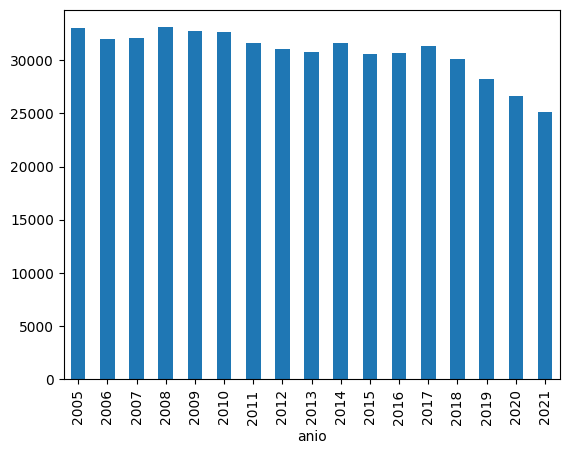

In [14]:
(
    df_b[year]
    .value_counts()
    .sort_index()
    .plot
    .bar()
)

Looks right

### Jurisdiction

In [15]:
df_b[jurisdiction['nombre']].isnull().sum()

2666

In [16]:
df_b[jurisdiction['nombre']].unique()

array(['Santa Fe', 'Ciudad Autónoma de Buenos Aires', 'Río Negro',
       'Chaco', 'Mendoza', 'La Pampa', 'Corrientes', 'Buenos Aires',
       'Chubut', 'Salta', 'Córdoba', 'Formosa', 'Misiones',
       'Santiago del Estero', 'San Luis', nan, 'Catamarca', 'Santa Cruz',
       'Entre Ríos', 'San Juan', 'Jujuy', 'Tucumán', 'Neuquén',
       'La Rioja',
       'Tierra del Fuego, Antártida e Islas del Atlántico Sur',
       'Sin Información'], dtype=object)

In [17]:
df_b[jurisdiction['id']].isnull().sum()

0

In [18]:
df_b[df_b[jurisdiction['nombre']].isnull()]['jurisdiccion_residencia_id'].value_counts()

jurisdiccion_residencia_id
98    2666
Name: count, dtype: int64

In [19]:
df_b[df_b[jurisdiction['nombre']] == 'Sin Información'][jurisdiction['id']].value_counts()

jurisdiccion_residencia_id
99    6929
Name: count, dtype: int64

jurisdiction id 98 is converted to 99, equivalent of 'Sin Información' ('no data')

In [20]:
df_b[jurisdiction['nombre']].fillna('Sin Información', inplace=True)
df_b[jurisdiction['id']] = df_b[jurisdiction['id']].replace(
    98, 99)

In [21]:
(
    df_b
    .loc[:,list(jurisdiction.values()) + ['nacimientos_cantidad']]
    .groupby(list(jurisdiction.values()))
    .count()
    .rename_column('nacimientos_cantidad','cantidad')
    .sort_values('cantidad', ascending=False)
    # .reset_index()
    .also(lambda df: print(f'Cantidad total: {df.cantidad.sum()}'))
)

Cantidad total: 522885


/home/federico/Documents/PersonalProyects/birth_rate_during_quarantine/env/lib/python3.10/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)


,,cantidad
jurisdiccion_residencia_id,jurisdiccion_residencia_nombre,
6,Buenos Aires,71368
14,Córdoba,30647
82,Santa Fe,30492
2,Ciudad Autónoma de Buenos Aires,29825
90,Tucumán,27137
22,Chaco,27079
18,Corrientes,26312
54,Misiones,26112
66,Salta,24708


In [22]:
df_b[jurisdiction.values()].isnull().any().sum()

0

### Labor

In [23]:
(
    df_b[labor]
    .value_counts()
    .reset_index()
    .also(lambda df: print(f"Total: {df['count'].sum()}"))
)

Total: 522884


,tipo_de_parto_id,tipo_de_parto_nombre,count
0,1.0,Simple,429752
1,2.0,Multiple,87348
2,9.0,Desconocido,5784


In [24]:
for col in labor:
    print(col,':', df_b[col].unique())

tipo_de_parto_id : [ 1.  2.  9. nan]
tipo_de_parto_nombre : ['Simple' 'Multiple' 'Desconocido' nan]


In [25]:
df_b[labor].isnull().sum()

tipo_de_parto_id        1
tipo_de_parto_nombre    1
dtype: int64

In [26]:
df_b[df_b[labor].isnull().any(axis=1)]

,anio,jurisdiccion_residencia_id,jurisdiccion_residencia_nombre,edad_madre_grupo,instruccion_madre,tipo_de_parto_id,tipo_de_parto_nombre,semana_gestacion,intervalo_peso_al_nacer,sexo_id,sexo,nacimientos_cantidad
522884,2017,99,Sin Información,9.Sin especificar,8.Sin especificar,NaN,NaN,8.Sin especificar,9.Sin especificar,9,desconocido,10


In [27]:
df_b[labor[0]].fillna(9, inplace=True)
df_b[labor[1]].fillna('Desconocido', inplace=True)

In [28]:
df_b[labor[0]] = df_b[labor[0]].astype(int)

In [29]:
(
    df_b[labor]
    .value_counts()
    .reset_index()
    .also(lambda df: print(f"Total: {df['count'].sum()}"))
)

Total: 522885


,tipo_de_parto_id,tipo_de_parto_nombre,count
0,1,Simple,429752
1,2,Multiple,87348
2,9,Desconocido,5785


### Others

In [30]:

for col in others:
    print(
        df_b[col]
        .value_counts()
        .sort_index()
        ,'\n'
    )

edad_madre_grupo
1.Menor de 15        13402
2.15 a 19            70154
3.20 a 24            93766
4.25 a 29            97566
5.30 a 34            94315
6.35 a 39            79155
7.40 a 44            46719
8.De 45 y más        12186
9.Sin especificar    15622
Name: count, dtype: int64 

instruccion_madre
1.Sin instrucción                       16990
2.Primaria/C. EGB Incompleta            58545
3.Primaria/C. EGB Completa              96921
4.Secundaria/Polimodal Incompleta       93768
5.Secundaria/Polimodal Completa         98486
6.Terciaria/Universitaria Incompleta    53434
7.Terciaria/Universitaria Completa      64533
8.Sin especificar                       40208
Name: count, dtype: int64 

semana_gestacion
1.Menos de 22          1766
2.22 a 23              4505
3.24 a 27             18963
4.28 a 31             43646
5.32 a 36            160328
6.37 a 41            217836
7.42 y más            27874
8.Sin especificar     47967
Name: count, dtype: int64 

intervalo_peso_al_nacer
1.Men

Looks right

## Export clean dataframe to .csv 

In [31]:
df_b.to_csv('../datasets/clean_births_df.csv',
              encoding='utf-8',
              header=True,
              index=False,
              )